Team ID : 20190001

Pierre LAVIEILLE (3035647962) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

# Imputation

In [6]:
#We import the data and we replace the missing by n/a
missing_values = [-7, -8, -9]
df = pd.read_csv('HelocData.csv', na_values = missing_values)
df.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,Bad,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,Good,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,Good,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,Bad,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0


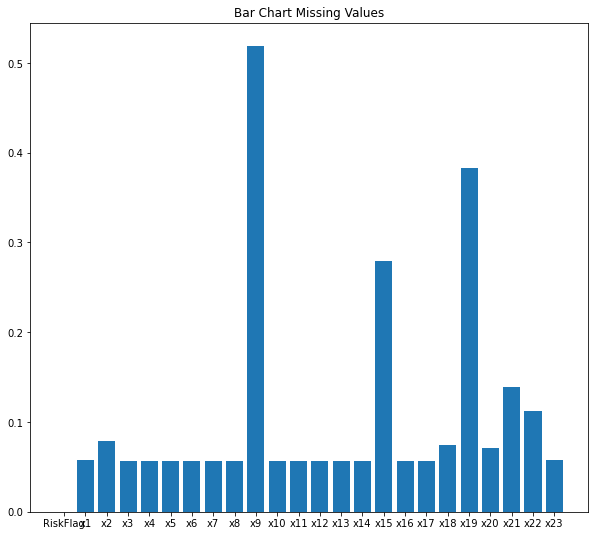

In [4]:
#Bar chart to visualize the number of missing values 
a=df.isnull().sum()
a=a/df.shape[0]

objects=df.columns
y = np.arange(len(objects))
plt.figure(1, figsize=(10, 9))
plt.bar(y, a)
plt.title('Bar Chart Missing Values')
plt.xticks(y, objects)

plt.show()

In [7]:
#We drop the feature with more than 20 percent missing values
df.drop(['x9', 'x15', 'x19'],axis=1, inplace=True)

In [8]:
#Split the data to do the imputation
X = df.iloc[:,1:]  #independent columns
y = df.iloc[:,0]   #target column i.e price range
names=X.columns

#We use iterative imputation in order to replace missing values 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X, y)
X=imp.transform(X)

In [9]:
# We regenerate a panda data frame
X2=pd.DataFrame(X, columns=names)
X2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x16,x17,x18,x20,x21,x22,x23
0,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,7.0,8.0,22.0,4.0,36.0,4.0,4.0,43.0,4.0,6.0,0.0,83.0
1,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,6.0,6.0,37.0,4.0,27.0,3.0,3.0,80.0,17.0,3.0,12.0,83.0
2,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,6.0,6.0,23.0,3.0,35.0,4.0,4.0,25.0,3.0,2.0,1.0,45.0
3,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,7.0,8.0,57.0,4.0,33.0,4.0,4.0,2.0,12.0,2.0,1.0,57.0
4,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,7.0,8.0,26.0,1.0,19.0,3.0,3.0,73.0,12.0,1.0,5.0,87.0


# Features selection

In [10]:
# L1-based feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.0005, penalty="l1", dual=False).fit(X2, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X2)
X_new.shape

(10459, 13)

In [11]:
# Thanks to the shape of X_new we know there are only 13 features left after the pre-processing 
# We compare the four first line of X_new and X2 to determine which feature we keep
print(X_new[0:4,:])
X2.head()

[[ 75. 169.   2.  59.  21.   0.   7.   8.  36.   4.  43.   4.  83.]
 [ 66. 502.   4. 145.  34.   0.   6.   6.  27.   3.  80.  17.  83.]
 [ 69. 338.   2.  62.  22.   0.   6.   6.  35.   4.  25.   3.  45.]
 [ 75. 422.   1.  91.  55.   0.   7.   8.  33.   4.   2.  12.  57.]]


,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x16,x17,x18,x20,x21,x22,x23
0,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,7.0,8.0,22.0,4.0,36.0,4.0,4.0,43.0,4.0,6.0,0.0,83.0
1,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,6.0,6.0,37.0,4.0,27.0,3.0,3.0,80.0,17.0,3.0,12.0,83.0
2,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,6.0,6.0,23.0,3.0,35.0,4.0,4.0,25.0,3.0,2.0,1.0,45.0
3,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,7.0,8.0,57.0,4.0,33.0,4.0,4.0,2.0,12.0,2.0,1.0,57.0
4,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,7.0,8.0,26.0,1.0,19.0,3.0,3.0,73.0,12.0,1.0,5.0,87.0


In [61]:
#We select the best features according to the L1-based feature selection
data=X2[['x1','x2','x3','x4','x5','x6','x10','x11','x14','x16','x18','x20','x23']]
data.insert(0, "RiskFlag", y, True) 
data.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x10,x11,x14,x16,x18,x20,x23
0,Bad,75.0,169.0,2.0,59.0,21.0,0.0,7.0,8.0,36.0,4.0,43.0,4.0,83.0
1,Bad,66.0,502.0,4.0,145.0,34.0,0.0,6.0,6.0,27.0,3.0,80.0,17.0,83.0
2,Good,69.0,338.0,2.0,62.0,22.0,0.0,6.0,6.0,35.0,4.0,25.0,3.0,45.0
3,Good,75.0,422.0,1.0,91.0,55.0,0.0,7.0,8.0,33.0,4.0,2.0,12.0,57.0
4,Bad,63.0,242.0,2.0,68.0,25.0,0.0,7.0,8.0,19.0,3.0,73.0,12.0,87.0


[0.16056189 0.08528035 0.06985936 0.08985583 0.08045376 0.02834882
 0.04395249 0.04212592 0.07578979 0.05853088 0.11435075 0.06619269
 0.08469746]


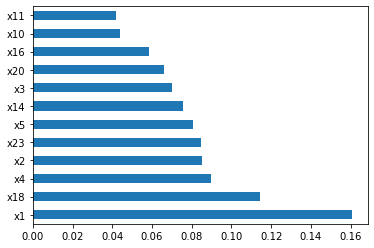

In [62]:
#IV importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(data.iloc[:,1:],y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=['x1','x2','x3','x4','x5','x6','x10','x11','x14','x16','x18','x20','x23'])
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [63]:
#correlation table 
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x3,x4,x5,x6,x10,x11,x14,x16,x18,x20,x23
x1,1.000000,0.252987,0.150163,0.331845,-0.001722,-0.412694,0.569052,0.500632,-0.166745,-0.207448,-0.627061,-0.331992,-0.454496
x2,0.252987,1.000000,0.105707,0.695285,0.246030,-0.013083,-0.007190,-0.002990,-0.191391,-0.107063,-0.188355,0.129090,-0.218328
x3,0.150163,0.105707,1.000000,0.403666,-0.250295,0.026906,0.004410,0.015048,-0.010275,-0.166588,-0.048742,-0.186818,-0.000791
x4,0.331845,0.695285,0.403666,1.000000,0.113129,0.038736,-0.014530,-0.034206,-0.198974,-0.179791,-0.207484,0.018724,-0.207916
x5,-0.001722,0.246030,-0.250295,0.113129,1.000000,-0.119163,-0.008325,0.036761,-0.131327,0.098250,-0.093317,0.492055,-0.230420
x6,-0.412694,-0.013083,0.026906,0.038736,-0.119163,1.000000,-0.422836,-0.587513,0.113858,0.039249,0.094797,-0.051272,0.113053
x10,0.569052,-0.007190,0.004410,-0.014530,-0.008325,-0.422836,1.000000,0.610689,-0.074205,-0.022601,-0.128780,-0.078587,-0.114738
x11,0.500632,-0.002990,0.015048,-0.034206,0.036761,-0.587513,0.610689,1.000000,-0.104778,-0.022078,-0.129274,-0.019611,-0.120495
x14,-0.166745,-0.191391,-0.010275,-0.198974,-0.131327,0.113858,-0.074205,-0.104778,1.000000,0.032794,0.176442,-0.288844,0.417110
x16,-0.207448,-0.107063,-0.166588,-0.179791,0.098250,0.039249,-0.022601,-0.022078,0.032794,1.000000,0.074666,0.088849,0.045167


**Remark :** \
We want the smallest correlation possible between our features, so we are going to drop the variable with more than 50 percent correlation and the smallest Variable Importance. \\
For example x1 and x10 have 0.569 of correlation, but x1 is (according to the graph of variable importance) the most important variable, so we drop x10.

In [64]:
data.drop(['x2', 'x10', 'x11', 'x23'],axis=1, inplace=True)

# Exploratory data analysis 

In [65]:
#Let's have a look to our final dataset
data.describe()

,x1,x3,x4,x5,x6,x14,x16,x18,x20
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,72.062497,9.588492,78.778138,21.121467,0.581400,34.618681,1.455982,35.244950,4.046621
std,9.595604,12.593693,33.094529,10.998519,1.203454,17.441416,2.075240,28.024982,2.950631
min,33.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-15.920073,-4.345963
25%,65.000000,3.000000,58.000000,13.000000,0.000000,22.000000,0.000000,10.000000,2.000000
50%,72.062497,6.000000,78.000000,21.000000,0.000000,33.000000,1.000000,33.000000,4.000000
75%,80.000000,11.000000,95.000000,27.000000,1.000000,44.000000,2.000000,55.000000,5.000000
max,95.808084,383.000000,383.000000,79.000000,19.000000,100.000000,66.000000,232.000000,32.000000


In [66]:
#Just as we wanted the correlation between our features is very low
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x3,x4,x5,x6,x14,x16,x18,x20
x1,1.000000,0.150163,0.331845,-0.001722,-0.412694,-0.166745,-0.207448,-0.627061,-0.331992
x3,0.150163,1.000000,0.403666,-0.250295,0.026906,-0.010275,-0.166588,-0.048742,-0.186818
x4,0.331845,0.403666,1.000000,0.113129,0.038736,-0.198974,-0.179791,-0.207484,0.018724
x5,-0.001722,-0.250295,0.113129,1.000000,-0.119163,-0.131327,0.098250,-0.093317,0.492055
x6,-0.412694,0.026906,0.038736,-0.119163,1.000000,0.113858,0.039249,0.094797,-0.051272
x14,-0.166745,-0.010275,-0.198974,-0.131327,0.113858,1.000000,0.032794,0.176442,-0.288844
x16,-0.207448,-0.166588,-0.179791,0.098250,0.039249,0.032794,1.000000,0.074666,0.088849
x18,-0.627061,-0.048742,-0.207484,-0.093317,0.094797,0.176442,0.074666,1.000000,0.301035
x20,-0.331992,-0.186818,0.018724,0.492055,-0.051272,-0.288844,0.088849,0.301035,1.000000


In [18]:
data.RiskFlag[data.RiskFlag == 'Good'] = 1
data.RiskFlag[data.RiskFlag == 'Bad'] = 0

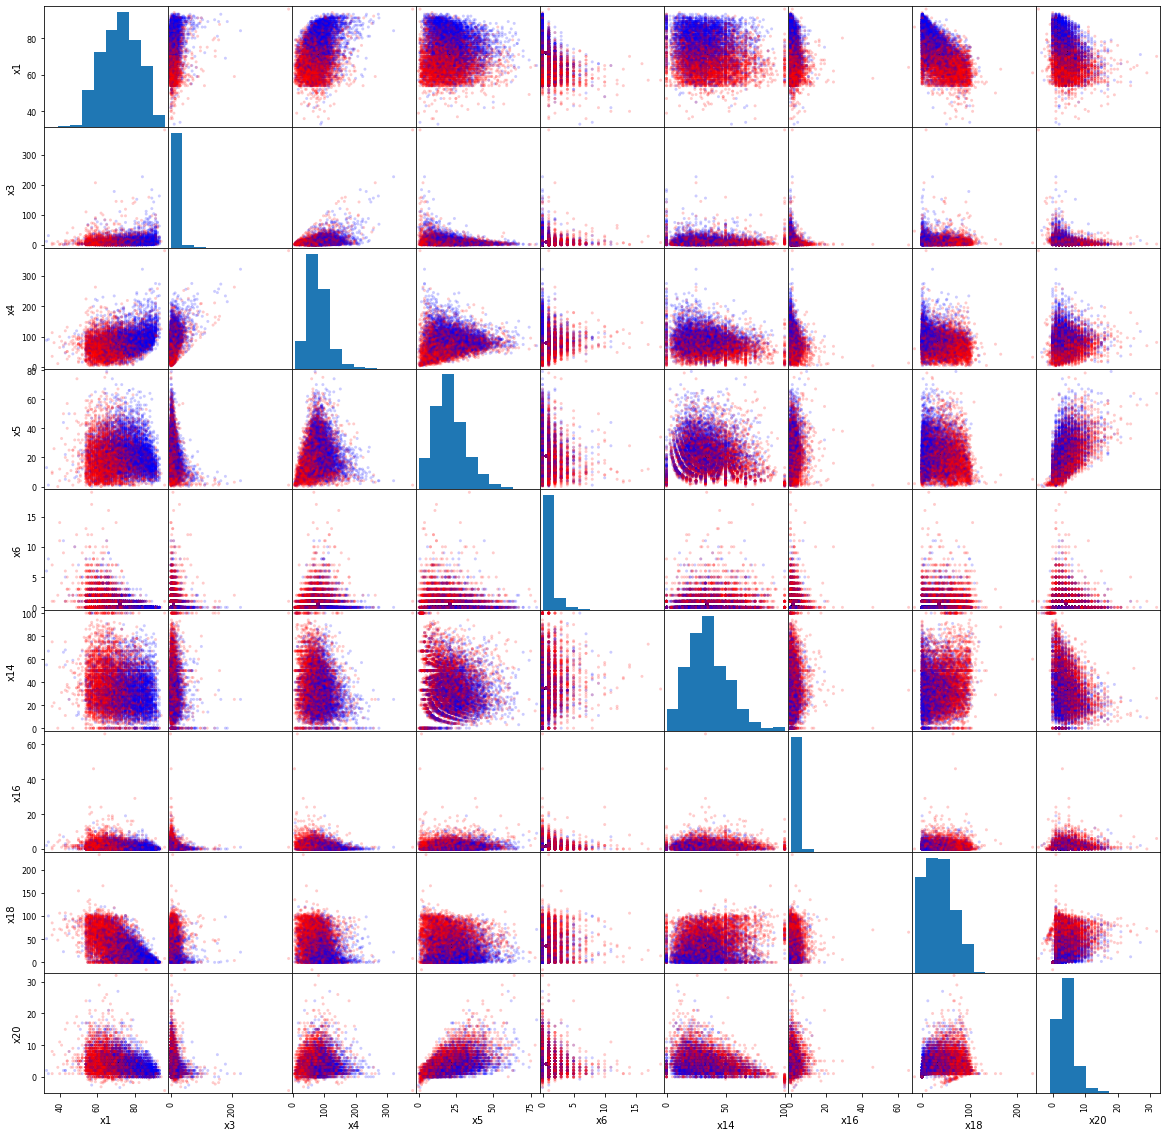

In [20]:
from pandas.plotting import scatter_matrix
import matplotlib.colors as col
scatter_matrix(data, alpha=0.2, figsize=(20, 20), c=data["RiskFlag"], cmap=col.ListedColormap(['red', 'blue']));

In [21]:
data.RiskFlag[data.RiskFlag == 1] = 'Good'
data.RiskFlag[data.RiskFlag == 0] = 'Bad'

**Remark :** \
Thanks to the correlation table we can see that the correlation between our features is very low, just as we wished. \
Moreover thanks to the upper graphics we can see that there are no clear interaction between our features. We cannot any linear (or other) interaction between our features. \
Nevertheless, we can see on the upper graph that there are a lot of 'empty space' in each square. This huge empty space denote an unhomogeneous distribution of our features. We should keep that in mind for our features engenering. \
Moreover thanks to the last graphics we can distinguish some gobal trend over the RiskFlag repartition. In this graphics the red point are the Bad RiskFlag and the Good RiskFlag are in Blue.


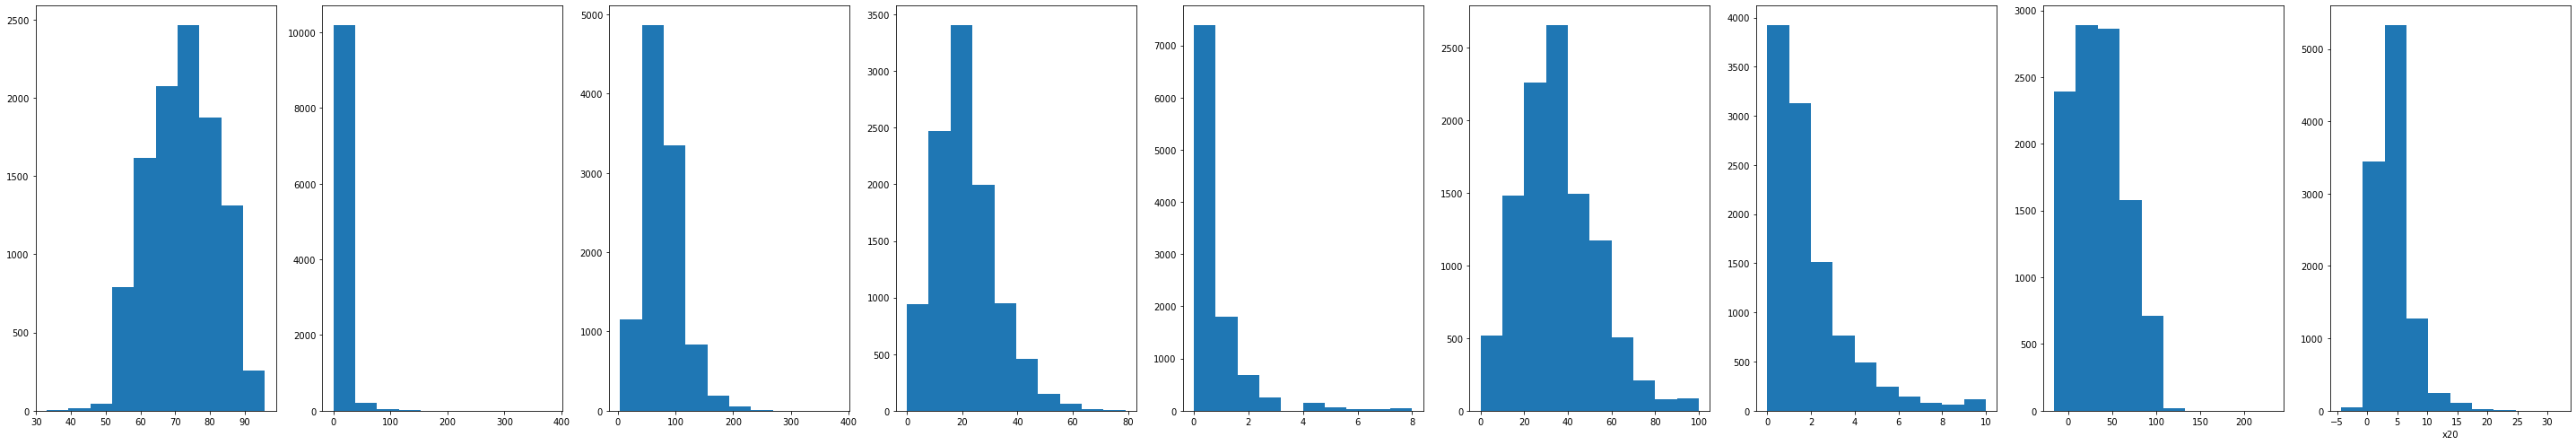

In [68]:
#Let's have a closer look to the histogram for each features to observe its distribution
fig,axes = plt.subplots(1,9,figsize=(40,7))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.hist(data.iloc[:,1+i].values)
    plt.xlabel(data.columns[1+i])
plt.tight_layout()

# Feature Engenering

**Remark :** \
As we can see acording to the graphics, the distribution of x6 and x16 is very heterogeneous. Nevertheless, those feature are already nearly categorical. So we decided that all the values above a fixed point will take the value of this point. This is the purpose of the function 'remplacer'. \\

Then we are just going to do a simple qcut to be sure all those two features are categorical

In [67]:
def remplacer(x,k):
  for j in range(0, len(x)) :
    if x[j]>k :
      x[j]=k

remplacer(data['x6'],8)
remplacer(data['x16'],10)

data['x6']=pd.cut(data['x6'], range(0, 10, 1),labels=np.arange(9), right=False)
data['x16']=pd.cut(data['x16'], range(0, 12, 1),labels=np.arange(11), right=False)
print(data['x6'].value_counts())
print(data['x16'].value_counts())

0    7390
1    1802
2     692
3     246
4     148
5      73
8      41
6      37
7      30
Name: x6, dtype: int64
0     3924
1     3133
2     1510
3      761
4      490
5      242
6      140
10      85
7       81
8       61
9       32
Name: x16, dtype: int64


In [69]:
#This line is not important in the feature ingenering but when we take it off we face problem after
data['x6'] = data['x6'].replace([8],[8])
data['x16'] = data['x16'].replace([8],[8])

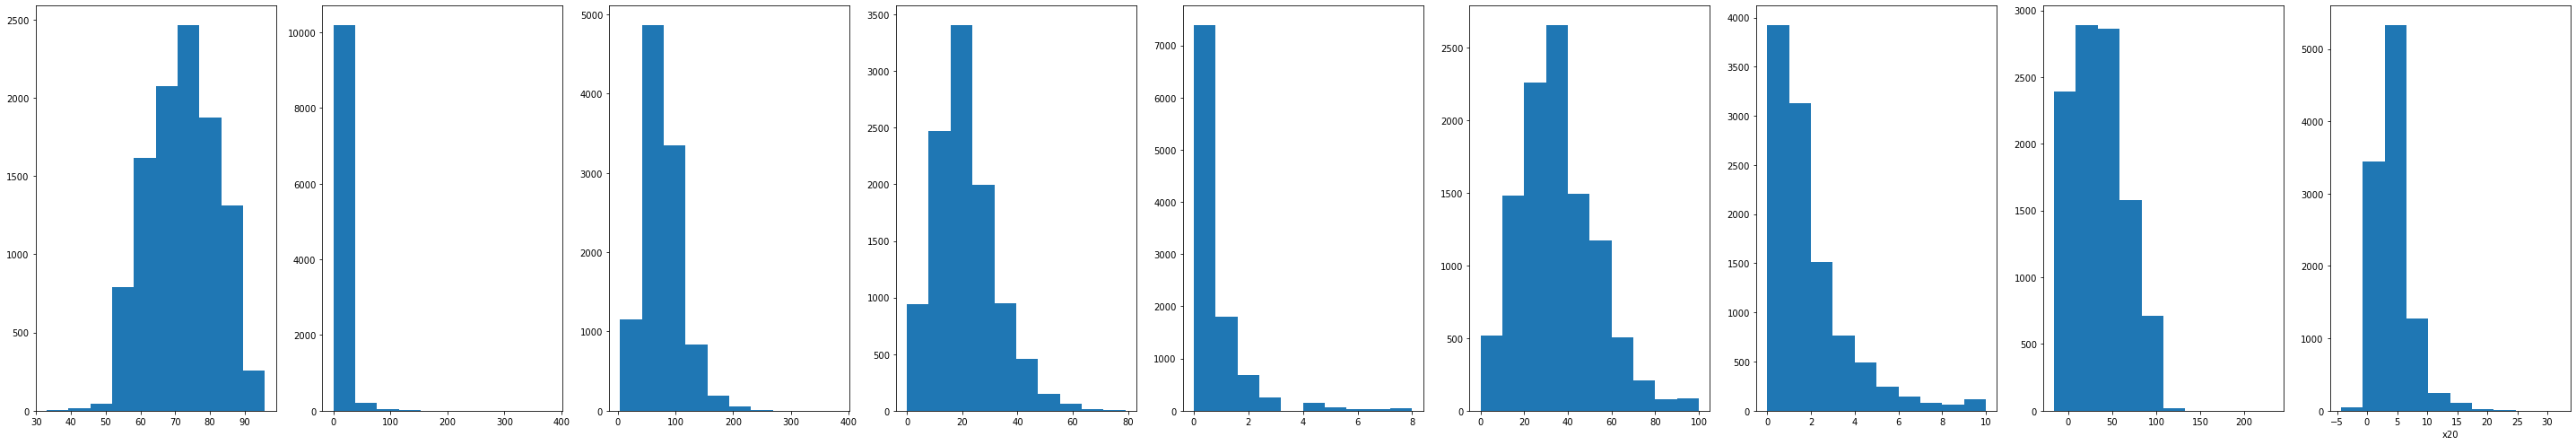

In [70]:
fig,axes = plt.subplots(1,9,figsize=(40,7))
axes = axes.flatten()
for i,ax in enumerate(axes):
    ax.hist(data.iloc[:,1+i].values)
    plt.xlabel(data.columns[1+i])
plt.tight_layout()

**Remark :** \
This is the same case for x3. Its distributuion is very heterogeneous. Nevertheless we can't do the same as for x6 and x16 as it is not categorical. So we are going to do a qcut and highlight the very hight values thanks to an asymetric cut. 

In [71]:
qx3=[data['x3'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9,1])]
print(qx3)
sx3=[0,2,3,4,5,6,8,10,13,20,100,383]

data['x3']=pd.cut(data['x3'], bins=sx3, labels=np.arange(11), right=False)

[0.1      2.000000
0.2      3.000000
0.3      4.000000
0.4      5.000000
0.5      6.000000
0.6      8.000000
0.7      9.588492
0.8     13.000000
0.9     20.000000
1.0    383.000000
Name: x3, dtype: float64]


In [72]:
#same as before
data['x3'] = data['x3'].replace([2]  ,[2])
print(data['x3'].value_counts())

6     1465
5     1235
8     1177
1     1161
9     1056
2     1015
3      885
7      847
0      838
4      754
10      25
Name: x3, dtype: int64


In [73]:
data['x3'] = data['x3'].replace([-9223372036854775808,2]  ,[2,2])
print(data['x3'].value_counts())

6     1465
5     1235
8     1177
1     1161
9     1056
2     1015
3      885
7      847
0      838
4      754
10      25
Name: x3, dtype: int64


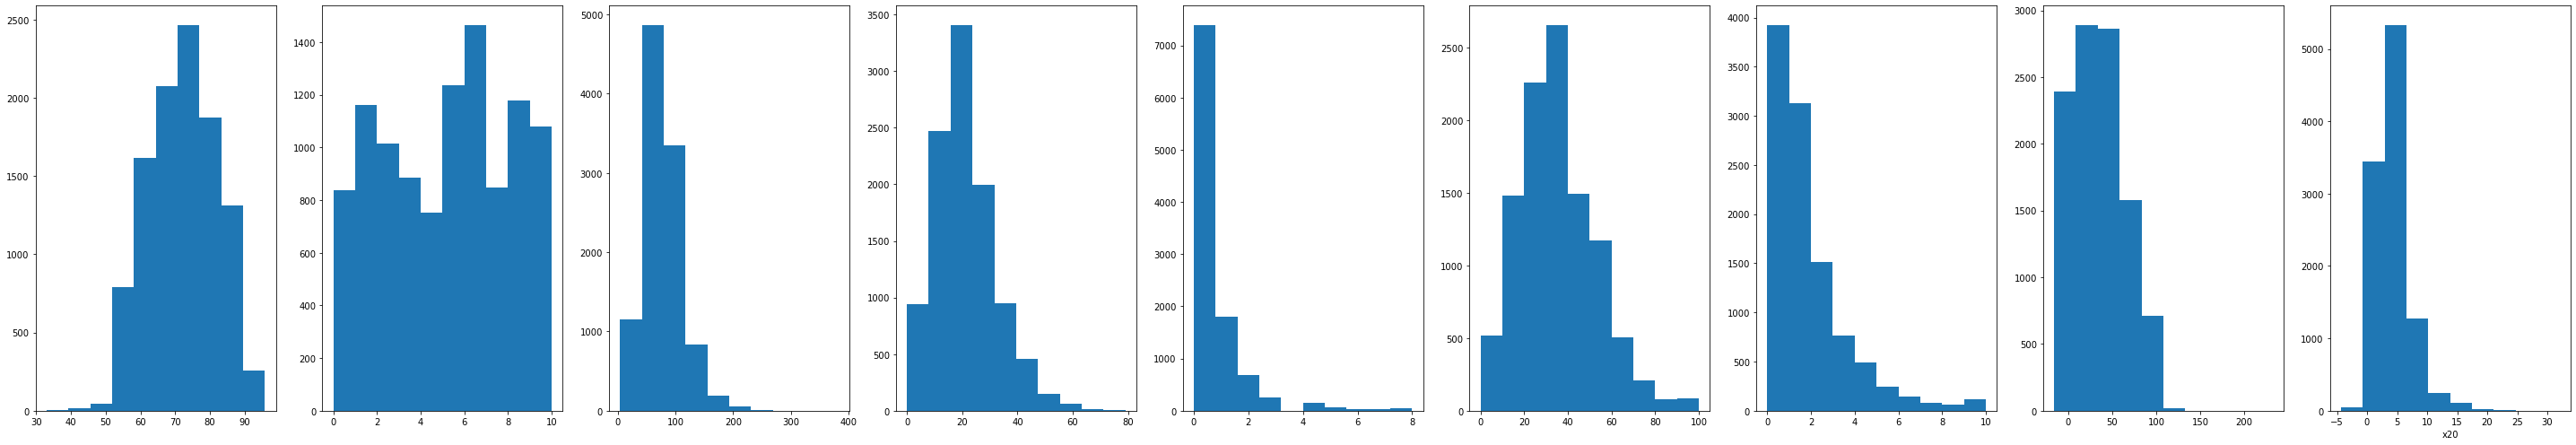

In [74]:
fig,axes = plt.subplots(1,9,figsize=(40,7))
axes = axes.flatten()
for i,ax in enumerate(axes):
    ax.hist(data.iloc[:,1+i].values)
    plt.xlabel(data.columns[1+i])
plt.tight_layout()

**Remark :** \
We finaly categorize the rest of the features thanks to a simple qcut.

In [75]:
k=7

data['x1']=pd.qcut(data['x1'], k, labels=False)
data['x4']=pd.qcut(data['x4'], k, labels=False)
data['x5']=pd.qcut(data['x5'], k, labels=False)
data['x14']=pd.qcut(data['x14'], k, labels=False)
data['x18']=pd.qcut(data['x18'], k, labels=False)
data['x20']=pd.qcut(data['x20'], k, labels=False)

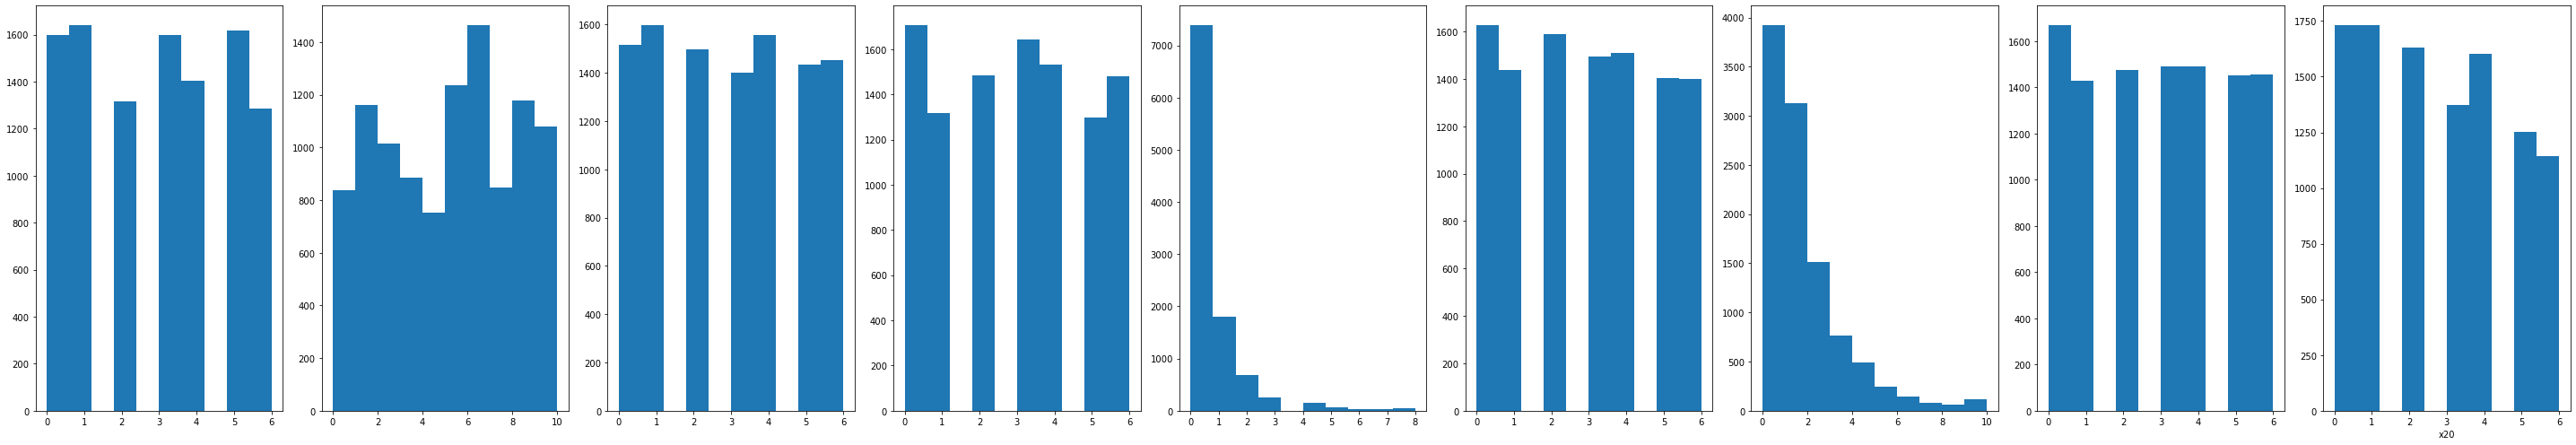

In [76]:
fig,axes = plt.subplots(1,9,figsize=(40,7))
axes = axes.flatten()
for i,ax in enumerate(axes):
    ax.hist(data.iloc[:,1+i].values)
    plt.xlabel(data.columns[1+i])
plt.tight_layout()

# XG boost

In [36]:
#We split the data 
np.random.seed(20190001)
df_train, df_test = train_test_split(data, test_size=0.2)
feature_names=['x1','x3','x4','x5','x6','x14','x16','x18','x20']

x_train = df_train[feature_names].values
y_train = df_train[['RiskFlag']].values
x_test = df_test[feature_names].values
y_test = df_test[['RiskFlag']].values

In [37]:
#XG boost
from xgboost import XGBClassifier
XGB_clf = XGBClassifier(max_depth=3, n_estimators=264, learning_rate=0.049)
XGB_clf.fit(x_train,y_train)

print("Training Accuracy:", accuracy_score(y_train, XGB_clf.predict(x_train)).round(4))
print("Test Accuracy:", accuracy_score(y_test, XGB_clf.predict(x_test)).round(4))

[15:09:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.7295
Test Accuracy: 0.7299


**Remark** \


*   Our training accuracy is equal to **73.11%**
*   Our test accuracy is equal to **73.14%**



# Interpretation

In [38]:
import shap
# define the explainer
explainer = shap.TreeExplainer(XGB_clf)
# calculate the shape value
shap_values = explainer.shap_values(x_test)

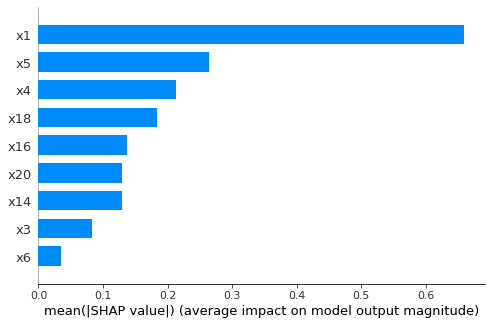

In [39]:
#Variable Importance graphic
shap.summary_plot(shap_values, x_test, plot_type="bar",feature_names=feature_names)

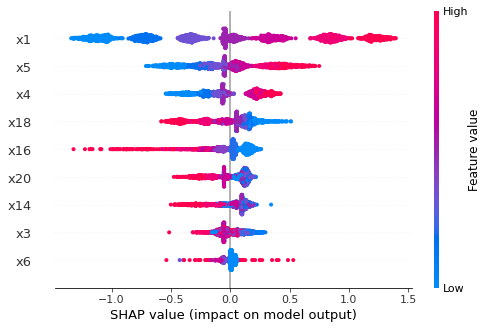

In [40]:
# summary plot
shap.summary_plot(shap_values, x_test,feature_names)

<Figure size 1440x216 with 0 Axes>

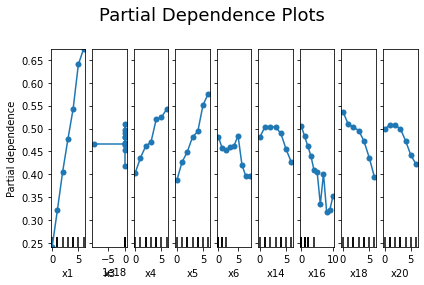

In [42]:
#Partial Dependence Plot
from sklearn.inspection import plot_partial_dependence as pdp

n_cols = 9
n_rows = 1

plt.figure(figsize=(20, 3))
pdp(XGB_clf, x_test,features=feature_names, feature_names=feature_names,
    n_cols=n_cols, line_kw={'marker': 'o', 'markeredgecolor': 'None'})

plt.suptitle('Partial Dependence Plots', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])

In [43]:
#global interpretation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test, feature_names=feature_names)

**Remark :** \
Thanks to the partial dependant plot, the summary plot and the upper graphic we can draw some conclusion over our different features 

*   x1 is by far the most important feature in our model
*   The importnace of x6 seems to be questionable in our model 
*   x1 is a increasing feature, nearly linear. This means the higher x1 is and the more chance we would have a 'good' loan. x1 has a possitive influence when it is higher than 3 (according to the shap graphics)
*   It is the same for x4 and x5, there are increasing features
*   x18 and x20 are decreasing feature, if x18 or x20 are height we have a higher chance to get a 'bad' loan
*   x14 is increasing between 0 and 3 and is decreasing after. Nevertheless, between O and 3 the the increasing is very low, nearly flat. We could also interpret that x14 has only a decreasing effect after some point.
*   For x16, the interpretation is harder. It is decreasing between 0 and 6, and seems to increase between 8 and 10. Nevertheless, 7 seems totaly different from the other features. It is probably linked with the feature selection we made. 
*   It is the same for x6. The feature seems globaly decreasing, nevertheless when x6 is equal to 5, the risk seems much lower. It is also probably linked with the feature engenering. 
*   the interpretation is harder for x3 as it seems more flat, nevertheless it seems it is globaly decreasing.




**Remark :** \
Let's refer to the meaning of the features to get a better global comprehension of our model.

*   *x1 : Consolidated version of risk markers* \
How x1 is the most important feature in our model is self-explanatory; this feature is an indicator for risk.

*   *x3 : Months Since Most Recent Trade Open* \
As we already mentioned, the interpretation of x3 is harder. Nevertheless, our previous hypothesis over the fact x3 is a decreasing feature seems logical. Indeed, if a client is inactive (no trade since a long time) the risk is higher as it reflects lower ability and willingness.
*   *x4 : Average Months in File* \
We said that x4 was an increasing feature, and it seems logical. The risk is lower for a client that we have been working with for a longer period of time. 
*   *x5 : Number Satisfactory Trades* \
x5 is an increasing. The more satisfactory trade a client made and the lower the risk is.
*   *x6 : Number Trades 60+ Ever* \
The number of trades 60+ seems to be a factor of risk. We notice maybe there is an optimal value of trades 60+ as when x6=5 the risk is much lower. Nevertheless, let's keep in mind that it is probably linked with our feature engineering and also that x6 is our least important feature.
*   *x14 : Percent Installment Trades* \
x14 is decreasing, the percentage of installment trades seems to be a factor of risk
*   *x16 : Number of Inq Last 6 Months* \
Let's suppose Inq meens Inquiry. This way the fact that x16 is globally decreasing would make sense as the number of inquiry is logically a factor of risk, indicative of unfamiliarity and growing concerns.
*   *x18 : Net Fraction Revolving Burden. This is revolving balance divided by credit limit* \
The net Fraction Revolving Burden seems to be a factor of risk
*   *x20 : Number Revolving Trades with Balance* \
The number Revolving Trades with Balance seems to be a factor of risk





In [46]:
# force plot
shap.initjs()

i = 1492

y_result_test=XGB_clf.predict(x_test)
print("For the", i,"th value the predicted value of y is" ,y_result_test[i],". Nevertheless, the true value of y is",y_test[i] )

shap.force_plot(explainer.expected_value, shap_values[i,:], x_test[i,:],feature_names=feature_names)

For the 1492 th value the predicted value of y is Good . Nevertheless, the true value of y is ['Good']


**Remark :** \
For the 1492th value our prediction is accurate. We obtained high values for x1 and x5, which are both increasing and important features, which explains the fact that this loan is a 'good' loan. More generally, all the feature seems to argue that the 1492th value is a 'good loan' as they all have a positive impact (in red in the upper graph). We can also notice that x3 as a negative impact, nevertheless x3 is a feature with a low importance.

In [47]:
# force plot
shap.initjs()

j = 200

y_result_test=XGB_clf.predict(x_test)
print("For the", j,"th value the predicted value of y is" ,y_result_test[j],". Nevertheless, the true value of y is",y_test[j] )

shap.force_plot(explainer.expected_value, shap_values[j,:], x_test[j,:],feature_names=feature_names)

For the 200 th value the predicted value of y is Bad . Nevertheless, the true value of y is ['Bad']


In [48]:
# force plot
shap.initjs()

k = 500

y_result_test=XGB_clf.predict(x_test)
print("For the", k  ,"th value the predicted value of y is" ,y_result_test[k],". Nevertheless, the true value of y is",y_test[k])

shap.force_plot(explainer.expected_value, shap_values[k,:], x_test[k,:],feature_names=feature_names)

For the 500 th value the predicted value of y is Bad . Nevertheless, the true value of y is ['Good']


**Remark :** \
For the 500th value our prediction is wrong. According to the upper graph the differents 'forces' seem to be pretty balanced. 
First of all, x1=3 which is the pivot value of x1 ( above 3 x1 as a positive impact and under it has a negative impact) but x1 is suppose to be our most important feature and in this case its importance is not that important. x1 has a positive impact.\
It is the same for our second most important values, x5 which is also equal to its pivo value. x5 has a positive impact.\
x14 has the most importance for this 500th value, it has a negative impact. \
More generally, our bad prediction for this value can be explain by a very balanced prediction, where all the features have more or less the same importance, and where the forces are nearly balanced. Indeed, the output value is very close to 0, as it is -0.17

